In [1]:
!pip3 install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip3 install -q umap-learn

In [1]:
import pykeen
import torch
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from pykeen.evaluation import ClassificationEvaluator
from pykeen.datasets import Countries

/home/space/miniconda3/envs/know/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/space/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from pykeen.datasets import Nations
dataset = Nations()

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [4]:
evaluator = ClassificationEvaluator()

In [15]:
def train_and_evaluate_model(dataset, device, evaluator, name_model):
    pipeline_results_list = []
    roc_auc_score = []
    precision = []
    accuracy = []
    f1 = []
    for i in range(0, 200, 40):
        pipeline_results = pipeline(
            model=name_model,
            dataset=dataset,
            training_kwargs=dict(num_epochs=i),
            device=device
        )

        pipeline_results_list.append(pipeline_results)

        model = pipeline_results.model

        metrics = evaluator.evaluate(model, dataset.testing.mapped_triples,
                                        additional_filter_triples=[dataset.training.mapped_triples,
                                                                dataset.validation.mapped_triples])

        roc_auc_score.append(metrics.get_metric('roc_auc_score'))
        precision.append(metrics.get_metric('average_precision_score'))
        accuracy.append(metrics.get_metric('accuracy_score'))
        f1.append(metrics.get_metric('f1_score'))

    return pipeline_results_list, roc_auc_score, precision, accuracy, f1

pipeline_results_list, roc_auc_score, precision, accuracy, f1 = train_and_evaluate_model(dataset, device, evaluator, name_model = 'ComplEx')

INFO:pykeen.pipeline.api:Using device: cuda
Training epochs on cuda:0: 0epoch [00:00, ?epoch/s]
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=201.
Evaluating on cuda:0: 100%|██████████| 201/201 [00:00<00:00, 15.9ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.02s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=201.
Evaluating on cuda:0: 100%|██████████| 201/201 [00:00<00:00, 17.1ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.02s seconds
INFO:pykeen.pipeline.api:Using device: cuda
Training epochs on cuda:0: 100%|██████████| 40/40 [00:05<00:00,  7.87epoch/s, loss=11, prev_loss=12.2]  
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with b

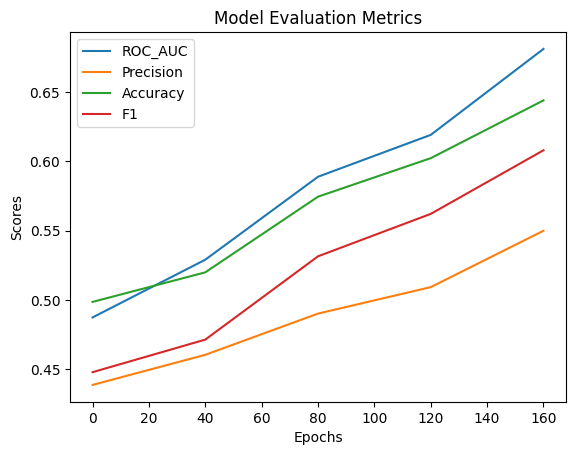

In [16]:
epochs = range(0, 200, 40)
labels = epochs

plt.plot(labels, roc_auc_score, label='ROC_AUC')

plt.plot(labels, precision, label='Precision')

plt.plot(labels, accuracy, label='Accuracy')

plt.plot(labels, f1, label='F1')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

plt.show()

In [17]:
from pykeen.predict import predict_target

for idx, ep in enumerate(epochs):
  pipeline_result = pipeline_results_list[idx]
  pred = predict_target(
      model=pipeline_result.model,
      head="ussr",
      relation="negativecomm",
      triples_factory=pipeline_result.training,
  )

  pred_filtered = pred.filter_triples(dataset.training)
  pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
  pred_df = pred_annotated.df[['tail_label','score']]
  print(f'Results {ep} epoch')
  print(pred_df)
  print('__________________________')

Results 0 epoch
     tail_label      score
5         india  83.452576
0        brazil  22.339153
9   netherlands  13.166575
4         egypt   9.378783
1         burma  -0.047304
11           uk  -4.295244
13         ussr  -5.332666
6     indonesia  -6.067008
10       poland  -8.805106
8        jordan -19.737692
3          cuba -20.412462
7        israel -36.564205
__________________________
Results 40 epoch
     tail_label      score
0        brazil  61.451782
4         egypt  23.088696
9   netherlands  19.939701
11           uk  11.137917
5         india  -7.215567
13         ussr  -9.958832
7        israel -11.258340
6     indonesia -18.364437
8        jordan -22.660378
3          cuba -32.069347
10       poland -33.772678
1         burma -37.400921
__________________________
Results 80 epoch
     tail_label      score
6     indonesia  20.065979
5         india  16.932699
8        jordan  12.308825
0        brazil   9.222944
3          cuba  -2.413158
4         egypt  -3.724258
7    

# new model


In [18]:
def train_and_evaluate_model(dataset, device, evaluator, name_model):
    pipeline_results_list = []
    roc_auc_score = []
    precision = []
    accuracy = []
    f1 = []
    for i in range(0, 200, 40):
        pipeline_results = pipeline(
            model=name_model,
            dataset=dataset,
            training_kwargs=dict(num_epochs=i),
            device=device
        )

        pipeline_results_list.append(pipeline_results)

        model = pipeline_results.model

        metrics = evaluator.evaluate(model, dataset.testing.mapped_triples,
                                        additional_filter_triples=[dataset.training.mapped_triples,
                                                                dataset.validation.mapped_triples])

        roc_auc_score.append(metrics.get_metric('roc_auc_score'))
        precision.append(metrics.get_metric('average_precision_score'))
        accuracy.append(metrics.get_metric('accuracy_score'))
        f1.append(metrics.get_metric('f1_score'))

    return pipeline_results_list, roc_auc_score, precision, accuracy, f1

pipeline_results_list, roc_auc_score, precision, accuracy, f1 = train_and_evaluate_model(dataset, device, evaluator, name_model = 'TransE')

INFO:pykeen.pipeline.api:Using device: cuda
Training epochs on cuda:0: 0epoch [00:00, ?epoch/s]
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=201.
Evaluating on cuda:0: 100%|██████████| 201/201 [00:00<00:00, 16.4ktriple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.02s seconds
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
/home/space/miniconda3/envs/know/lib/python3.8/site-packages/rexmex/metrics/classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
/home/space/miniconda3/envs/know/lib/python3.8/site-packages/rexmex/metrics/classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=201.
Evaluating on cuda:0:   0%|          | 0.00/201 [00:00<?, ?triple/s

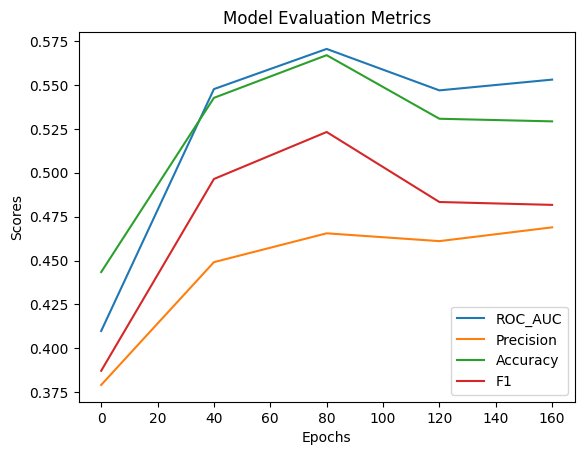

In [19]:
epochs = range(0, 200, 40)
labels = epochs

plt.plot(labels, roc_auc_score, label='ROC_AUC')

plt.plot(labels, precision, label='Precision')

plt.plot(labels, accuracy, label='Accuracy')

plt.plot(labels, f1, label='F1')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

plt.show()

In [20]:
for idx, ep in enumerate(epochs):
  pipeline_result = pipeline_results_list[idx]
  pred = predict_target(
      model=pipeline_result.model,
      head="ussr",
      relation="negativecomm",
      triples_factory=pipeline_result.training,
  )

  pred_filtered = pred.filter_triples(dataset.training)
  pred_annotated = pred_filtered.add_membership_columns(validation=dataset.validation, testing=dataset.testing)
  pred_df = pred_annotated.df[['tail_label','score']]
  print(f'Results {ep} epoch')
  print(pred_df)
  print('__________________________')

Results 0 epoch
     tail_label      score
13         ussr  -6.267204
3          cuba  -9.684525
0        brazil -10.217400
8        jordan -10.343038
11           uk -10.583364
9   netherlands -10.756828
1         burma -10.841982
7        israel -11.282674
4         egypt -11.328651
6     indonesia -11.601489
10       poland -11.957211
5         india -11.987869
__________________________
Results 40 epoch
     tail_label      score
13         ussr  -6.947988
0        brazil  -9.370872
9   netherlands  -9.633505
10       poland -10.023026
5         india -10.149795
7        israel -10.300238
1         burma -10.381315
6     indonesia -10.457119
3          cuba -10.588264
11           uk -10.756362
8        jordan -11.197076
4         egypt -11.643274
__________________________
Results 80 epoch
     tail_label      score
13         ussr  -6.832955
10       poland  -8.080071
3          cuba  -9.235615
11           uk  -9.684060
9   netherlands  -9.812971
7        israel -10.232523
6    